In [17]:
import numpy as np  # linear algebra
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import random
import os
import numpy as np

# Sample DayClip6

In [18]:

anno_path_box = "./data/samples/sample-dayClip6/frameAnnotationsBOX.csv"
anno_path_bulb = "./data/samples/sample-dayClip6/frameAnnotationsBULB.csv"
frames_path = "./data/samples/sample-dayClip6/frames/"

frame_id = random.choice(os.listdir(frames_path))
frame_path = os.path.join(os.path.join(frames_path,frame_id))
print("Found image:\t'{}'\nLocation:\t'{}'".format(frame_id, frame_path))

annotations = []
with open(anno_path_box) as fp:  
    line = fp.readline()
    line = fp.readline() # Skip header line with descriptions
    #cnt = 1
    while line:
        anno_file_path = (line.strip()).split(";")
        anno_file_id = anno_file_path[0].split("/")[1]
        if anno_file_id == frame_id:
            annotations.append(anno_file_path)
            #print("\t{}".format(anno_file_id))
        line = fp.readline()

Found image:	'dayClip6--00344.jpg'
Location:	'./data/samples/sample-dayClip6/frames/dayClip6--00344.jpg'


Found 2 annotations:
	Class: 'go' at [636,277,657,312]
	Class: 'go' at [837,382,849,402]


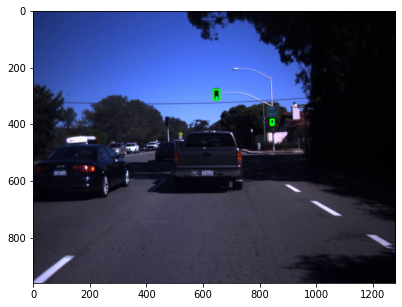

In [21]:
# Plot annotations on image
color_space = [(0,255,0),(255,0,0),(255,0,0)]
img = cv2.imread(frame_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Found {} annotations:".format(len(annotations)))

for anno in annotations:
    anno_class = anno[1]
    anno_left = int(anno[2])
    anno_top = int(anno[3])
    anno_right = int(anno[4])
    anno_bot = int(anno[5])
    print("\tClass: '{}' at [{},{},{},{}]".format(anno_class, anno_left, anno_top, anno_right, anno_bot))
    if anno_class == "go" or anno_class == "goLeft" or anno_class == "goForward":
        color_class = color_space[0]
    elif anno_class == "warning" or anno_class == "warningLeft":
        color_class = (255,255,0)
    elif anno_class == "stop" or anno_class == "stopLeft":
        color_class = (255,0,0)
    cv2.rectangle(img, (anno_left, anno_top), (anno_right, anno_bot), color_class, 5)

    plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(img)
plt.show()
